###### The entire world is transforming digitally and our relationship with technology has grown exponentially over the last few years. We have grown closer to technology, and it has made our life a lot easier by saving time and effort. Today everything is accessible with smartphones — from groceries to cooked food and from medicines to doctors. In this hackathon, we provide you with data that is a by-product as well as a thriving proof of this growing relationship. 

###### When was the last time you ordered food online? And how long did it take to reach you?

###### In this hackathon, we are providing you with data from thousands of restaurants in India regarding the time they take to deliver food for online order. As data scientists, your goal is to predict the online order delivery time based on the given factors.

###### Analytics India Magazine and IMS Proschool bring to you ‘Predicting Predicting Food Delivery Time Hackathon’.

###### Size of training set: 11,094 records

###### Size of test set: 2,774 records

###### FEATURES:

###### Restaurant: A unique ID that represents a restaurant.
###### Location: The location of the restaurant.
###### Cuisines: The cuisines offered by the restaurant.
###### Average_Cost: The average cost for one person/order.
###### Minimum_Order: The minimum order amount.
###### Rating: Customer rating for the restaurant.
###### Votes: The total number of customer votes for the restaurant.
###### Reviews: The number of customer reviews for the restaurant.
###### Delivery_Time: The order delivery time of the restaurant. (Target Classes) 

##### Links for Reference: https://www.machinehack.com/course/predicting-restaurant-food-cost-hackathon/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# for plotting the ROC Curve
from sklearn.metrics import roc_curve, auc

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtree=ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
from sklearn.decomposition import PCA

In [3]:
trainset = pd.read_excel(r'E:\Huyen\DS_Practice\Predict Delivery Time\Participants Data\Data_Train.xlsx')
testset = pd.read_excel(r'E:\Huyen\DS_Practice\Predict Delivery Time\Participants Data\Data_Test.xlsx')


In [4]:
trainset.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
trainset.shape

(11094, 9)

In [6]:
testset.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [7]:
testset.shape

(2774, 8)

#### First we need to clean and perform EDA on this dataset

In [10]:
trainset.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 390.1+ KB


In [11]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 86.7+ KB


In [12]:
#transform data and replace the addional symbol

trainset['Restaurant']=le.fit_transform(trainset['Restaurant'])
trainset['Location']=le.fit_transform(trainset['Location'])
trainset['Minimum_Order']=pd.to_numeric(trainset['Minimum_Order'].str.replace('₹',' '))
trainset['Average_Cost']=pd.to_numeric(trainset['Average_Cost'].str.replace('[^0-9]',''))
trainset['Rating']=pd.to_numeric(trainset['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
trainset['Votes']=pd.to_numeric(trainset['Votes'].apply(lambda x : np.nan if x=='-' else x))
trainset['Reviews']=pd.to_numeric(trainset['Reviews'].apply(lambda x : np.nan if x=='-' else x))
trainset['Delivery_Time']=pd.to_numeric(trainset['Delivery_Time'].str.replace('[^0-9]',''))

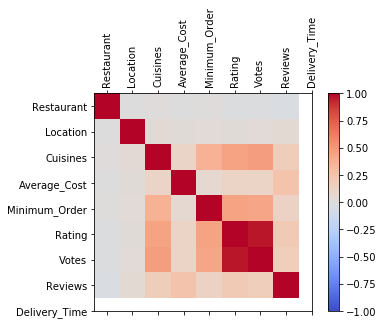

In [13]:
corr = trainset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(trainset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(trainset.columns)
ax.set_yticklabels(trainset.columns)
plt.show()

In [11]:
trainset.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,521.0,235.0,65


In [12]:
# Check missing value

trainset.columns[trainset.isnull().any()]

Index(['Average_Cost', 'Rating', 'Votes', 'Reviews'], dtype='object')

In [13]:
# Fill up the missing Value

q1=trainset['Rating'].quantile(0.25)
q3=trainset['Rating'].quantile(0.75)
iqr=q3-q1
trainset['Rating']=trainset['Rating'].apply(lambda x: np.nan if x>q3+1.5*iqr or x<q1-1.5*iqr else x)
trainset['Rating']=trainset['Rating'].fillna(trainset['Rating'].median())


q1=trainset['Votes'].quantile(0.25)
q3=trainset['Votes'].quantile(0.75)
iqr=q3-q1
trainset['Votes']=trainset['Votes'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
trainset['Votes']=trainset['Votes'].fillna(trainset['Votes'].mode()[0])


q1=trainset['Reviews'].quantile(0.25)
q3=trainset['Reviews'].quantile(0.75)
iqr=q3-q1
trainset['Reviews']=trainset['Reviews'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
trainset['Reviews']=trainset['Reviews'].fillna(round(trainset['Reviews'].mean()))

q1=trainset['Average_Cost'].quantile(0.25)
q3=trainset['Average_Cost'].quantile(0.75)
iqr=q3-q1
trainset['Average_Cost']=trainset['Average_Cost'].apply(lambda x: np.nan if x>(q3+1.5*iqr) or x<(q1-1.5*iqr) else x)
trainset['Average_Cost']=trainset['Average_Cost'].fillna(round(trainset['Average_Cost'].mean()))

In [14]:
trainset.dtypes

Restaurant         int32
Location           int32
Cuisines          object
Average_Cost     float64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time      int64
dtype: object

In [15]:
trainset.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [16]:
trainset.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65
5,4030,26,"South Indian, North Indian, Chinese",150.0,50,3.8,46.0,18.0,30
6,2649,19,"Beverages, Fast Food",150.0,50,3.7,108.0,31.0,30
7,6168,8,"Chinese, Thai, Asian",173.0,50,4.0,4.0,39.0,45
8,1871,8,"Mithai, Street Food",100.0,50,3.9,110.0,26.0,30
9,2353,28,"Fast Food, North Indian, Rolls, Chinese, Momos...",200.0,50,3.9,4.0,39.0,65


In [17]:
trainset.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [18]:
trainset["Average_Cost"] = trainset.Average_Cost.convert_objects(convert_numeric=True)

In [19]:
trainset["Minimum_Order"] = trainset.Minimum_Order.convert_objects(convert_numeric=True)
trainset["Rating"] = trainset.Rating.convert_objects(convert_numeric=True)
trainset["Votes"] = trainset.Votes.convert_objects(convert_numeric=True)
trainset["Reviews"] = trainset.Reviews.convert_objects(convert_numeric=True)

In [20]:
trainset.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [21]:
# Let's look at the distribution of each column, this would help us choose the most ideal feature normalization method.
# First let's define a method that plots the distribution of each feature.

def plot_features(trainset):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background
    plt.suptitle('Visualizing The Features Distribution', y=0.95)

    plt.subplot(241)
    color_list = ['gold','purple','brown']
    trainset.Average_Cost.plot(kind='hist', color='brown')
    plt.xlabel('Average_Cost')
    plt.ylabel('Delivery_Time')

    plt.subplot(242)
    color_list = ['gold','purple','brown']
    trainset.Minimum_Order.plot(kind='hist', color='brown')
    plt.xlabel('Minimum_Order')
    plt.ylabel('Delivery_Time')

    plt.subplot(243)
    color_list = ['gold','purple','brown']
    trainset.Rating.plot(kind='hist', color='brown')
    plt.xlabel('Rating')
    plt.ylabel('Delivery_Time')


    plt.subplot(244)
    color_list = ['gold','purple','brown']
    trainset.Votes.plot(kind='hist', color='brown')
    plt.xlabel('Votes')
    plt.ylabel('Delivery_Time')

    plt.subplot(245)
    color_list = ['gold','purple','brown']
    trainset.Reviews.plot(kind='hist', color='brown')
    plt.xlabel('Reviews')
    plt.ylabel('Frequency')

    plt.show()



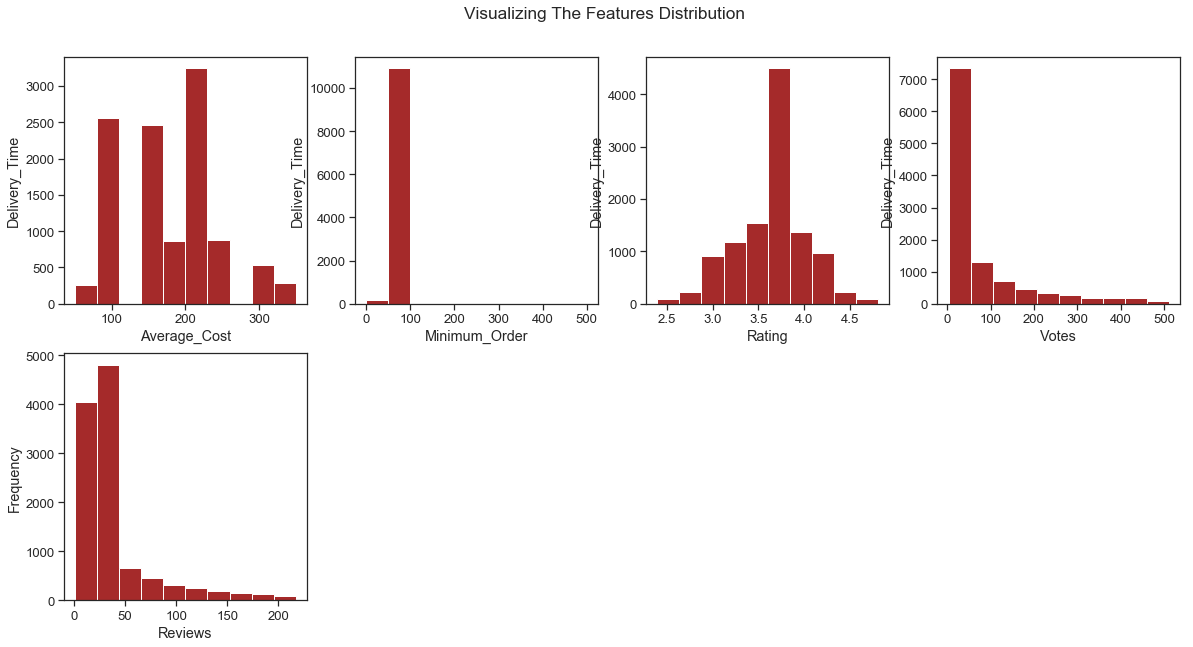

In [22]:
plot_features(trainset)

In [23]:
#reference link: https://www.kaggle.com/sabinhashmi/machine-hack-delivery-time-prediction
### reference: https://github.com/chetanambi/Predicting-Food-Delivery-Time-Hackathon-by-IMS-Proschool/blob/master/predicting-food-delivery-time-catboost_0.83958.ipynb


# Keep Copy of Train Data before transforming

train_dataCopy = trainset.copy()

In [24]:
trainset['Cuisines']=le.fit_transform(trainset['Cuisines'])

In [25]:
x=trainset.drop('Delivery_Time',axis=1)
y=trainset['Delivery_Time']

In [26]:
x=x.apply(zscore)

In [27]:
start_time=time()
model_list=[lr,dt,knn,rf,ada,bag,xtree]
Score=[]
for i in model_list:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    Score.append(score)
print(pd.DataFrame(zip(model_list,Score),columns=['Model Used','R2-Score']))
end_time=time()
print(round(end_time-start_time,2),'sec')

                                          Model Used  R2-Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.684890
1  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.711625
2  KNeighborsClassifier(algorithm='auto', leaf_si...  0.690297
3  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.777110
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.632022
5  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.766897
6  (ExtraTreeClassifier(ccp_alpha=0.0, class_weig...  0.777711
3.9 sec


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.779212976869931

In [29]:
# we have text in column cusines which are contains food name. Food preration is one of factor affecting to time of food delivery.
# Let us use some technique to analyze those text

# Keep Copy of Train Data before transforming

train_dataCopy.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,5086,10,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30
1,1785,30,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30
2,571,19,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65
3,4708,28,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30
4,4896,26,"Cafe, Beverages",200.0,99,3.2,4.0,39.0,65


In [30]:
train_dataCopy['Cuisines']=train_dataCopy['Cuisines'].str.lower()
train_dataCopy['Cuisines']=train_dataCopy['Cuisines'].str.replace('[^a-z]',' ')

In [31]:
count.fit(train_dataCopy['Cuisines'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [32]:
Train_Cols=['Restaurant','Location','Average_Cost','Minimum_Order','Rating','Votes','Reviews']

In [33]:
#Combine two columns of Cuisines and Delivery Time

data=pd.concat([pd.DataFrame(zscore(train_dataCopy.drop(['Cuisines','Delivery_Time'],axis=1)),columns=Train_Cols),pd.DataFrame(count.transform(train_dataCopy['Cuisines']).todense())],axis=1)


In [34]:
x=data
y=train_dataCopy['Delivery_Time']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7912285971763292

### Applying PCA for Dimensionality Reduction.

In [36]:
x=data
y=train_dataCopy['Delivery_Time']

In [37]:
x.shape

(11094, 115)

In [38]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

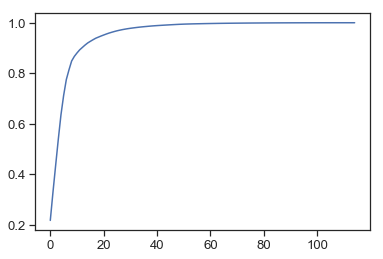

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [40]:
pca=PCA(n_components=22)


In [41]:
x=pca.fit_transform(x)


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7677981375788525

In [43]:
grid=GridSearchCV(rf,param_grid={'n_estimators':range(1,10)},return_train_score=1).fit(x_train,y_train)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text xticklabel objects>)

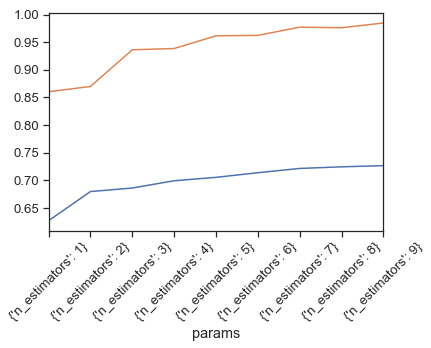

In [44]:
pd.DataFrame(grid.cv_results_).set_index('params')['mean_test_score'].plot.line()
pd.DataFrame(grid.cv_results_).set_index('params')['mean_train_score'].plot.line()
plt.xticks(rotation=45)

# working on test set

In [45]:
testset['Restaurant']=le.fit_transform(testset['Restaurant'])
testset['Location']=le.fit_transform(testset['Location'])
testset['Minimum_Order']=pd.to_numeric(testset['Minimum_Order'].str.replace('₹',' '))
testset['Average_Cost']=pd.to_numeric(testset['Average_Cost'].str.replace('[^0-9]',''))
testset['Rating']=pd.to_numeric(testset['Rating'].apply(lambda x : np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
testset['Votes']=pd.to_numeric(testset['Votes'].apply(lambda x : np.nan if x=='-' else x))
testset['Reviews']=pd.to_numeric(testset['Reviews'].apply(lambda x : np.nan if x=='-' else x))
testset['Rating']=testset['Rating'].fillna(testset['Rating'].median())
testset['Votes']=testset['Votes'].fillna(testset['Votes'].mode()[0])
testset['Reviews']=testset['Reviews'].fillna(testset['Reviews'].median())
testset['Average_Cost']=testset['Average_Cost'].fillna(testset['Average_Cost'].mean())


sample = pd.read_excel(r'E:\Huyen\DS_Practice\Predict Delivery Time\Participants Data\Sample_Submission.xlsx')

sample['Delivery_Time']=le.fit_transform(pd.to_numeric(sample['Delivery_Time'].str.replace('[^0-9]','')))

In [47]:
testset['Cuisines']=testset['Cuisines'].str.lower()
testset['Cuisines']=testset['Cuisines'].str.replace('[^a-z]',' ')

In [49]:
count.fit(testset['Cuisines'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [50]:
pca=PCA(n_components=22)

In [53]:
data=pd.concat([pd.DataFrame(zscore(testset.drop(['Cuisines'],axis=1)),columns=Train_Cols),pd.DataFrame((count.transform(testset['Cuisines']).todense()))],axis=1)

In [54]:
data.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,0,1,2,...,82,83,84,85,86,87,88,89,90,91
0,-0.897152,0.010057,1.350471,-0.177278,1.619203,0.368696,0.503777,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.093993,0.010057,-0.833142,-0.177278,-0.000097,-0.368519,-0.256583,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.113111,1.155165,-0.833142,-0.177278,-0.000097,-0.308126,-0.294793,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.292626,-1.655553,0.040303,-0.177278,-0.000097,-0.245650,-0.229837,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.715220,1.155165,-0.396419,-0.177278,-1.889281,-0.303961,-0.302434,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x=pca.fit_transform(data)


In [56]:
data['Delivery_Time']=pd.DataFrame(rf.predict(x))


In [57]:
data['Delivery_Time'].value_counts()


30    2529
45     244
65       1
Name: Delivery_Time, dtype: int64

In [58]:
sample_refined=[]
for i in data['Delivery_Time']:
    i=(str(i)+' minutes')
    sample_refined.append(i)

In [62]:
sample_refined=pd.DataFrame(sample_refined,columns=['Delivery_Time'])
sample_refined.to_excel('Final_Submit.xlsx',index=False)

In [63]:
pd.read_excel('Final_Submit.xlsx')['Delivery_Time'].value_counts()

30 minutes    2529
45 minutes     244
65 minutes       1
Name: Delivery_Time, dtype: int64